# Multiobjective evolutionary optimization
This example shows how to run the optimization algorithms contained in the `evoalgos` package. It optimises four typical SWIM parameters to the (reversed) NSE and absolute bias at the Blankenstein station.

In [1]:
# hidden cell: code to setup
import swimpy, os, shutil
%matplotlib inline

test_path = os.path.join(os.path.dirname(swimpy.__file__), '../tests')
project_path = os.path.join(test_path, 'project')
os.chdir(project_path)

if not os.path.exists('swimpy'):
    raise RuntimeError('Make sure the project is setup.')

shutil.copy(os.path.join(test_path, 'test_settings.py'), os.path.join('swimpy', 'settings.py'))
with open(os.path.join(project_path, 'swimpy', 'settings.py'), 'a') as f:
    f.write("from swimpy.optimization import SMSEMOA\n")


## *Prerequisites*

The objective functions used here (NSE and pbias) rely on observed discharge, i.e. make sure the `stations` are [properly setup](../modules/utils.rst#swimpy.utils.StationsUnconfigured) in the `swimpy/settings.py` file.

In [ ]:
import swimpy

objectives = ['subbasin_label_daily_selected_stations_discharge.rNSE.BLANKENSTEIN',
              'subbasin_label_daily_selected_stations_discharge.pbias_abs.BLANKENSTEIN']

# low, high ranges
parameters = {'smrate': (0.2, 0.7),
              'sccor': (0.1, 10),
              'ecal': (0.7, 1.3),
              'roc2': (0.5, 10)}

# load the project instance
p = swimpy.Project()

# this works for local runs
p.settings(cluster_run_parallel_parallelism='mp')

# silence swim
p.config_parameters(log_stdout_level='error',
                    log_stderr_level='error')

# adjust runtime and make sure subcatch is switched off
p.config_parameters(nbyr=2)

# runs swim 10 x 10 times using all available CPU cores
run = p.SMSEMOA(parameters, objectives, population_size=10, max_generations=10)

## Visualising the results

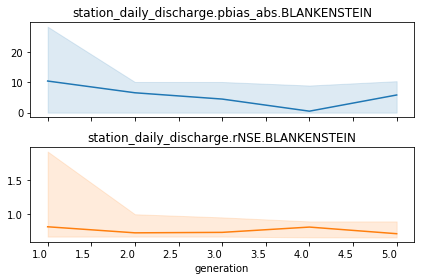

In [ ]:
from matplotlib import pyplot as plt

# development of objective functions with generations
_ = run.optimization_populations.plot_generation_objectives()

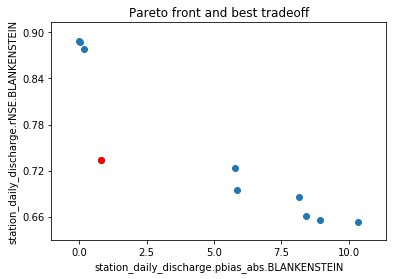

In [ ]:
# the Pareto front with the 'best tradeoff' marked
run.optimization_populations.plot_objective_scatter(best=True)
title = plt.title('Pareto front and best tradeoff')

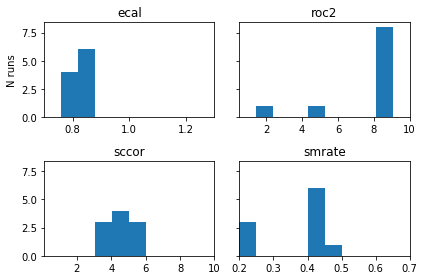

In [ ]:
# parameter distribution
_ = run.optimization_populations.plot_parameter_distribution()